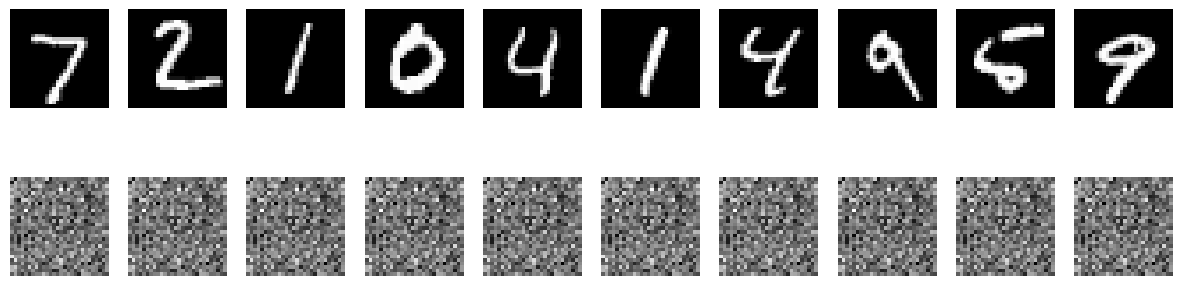

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_test = x_test.astype('float32') / 255.0    # Normalize to [0, 1]

# Flatten the 28x28 images into 784-dimensional vectors
x_train_flat = x_train.reshape((-1, 28 * 28))
x_test_flat = x_test.reshape((-1, 28 * 28))

# Hyperparameters
input_size = 28 * 28  # 784 pixels per image
latent_size = 32      # Latent space size

# Initialize weights and biases (encoder and decoder)
def initialize_variables():
    W_enc = np.random.randn(input_size, latent_size) * 0.01  # Encoder weights
    b_enc = np.zeros((latent_size,))                          # Encoder biases
    W_dec = np.random.randn(latent_size, input_size) * 0.01  # Decoder weights
    b_dec = np.zeros((input_size,))                           # Decoder biases
    return W_enc, b_enc, W_dec, b_dec

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Encoder: Map input to latent space
def encoder(x, W_enc, b_enc):
    return sigmoid(np.dot(x, W_enc) + b_enc)  # Sigmoid activation

# Decoder: Reconstruct input from latent space
def decoder(z, W_dec, b_dec):
    net = sigmoid(np.dot(z, W_dec) + b_dec)  # Sigmoid activation
    return net / 255.0

# Perform the forward pass on the test data
def forward_pass(x, W_enc, b_enc, W_dec, b_dec):
    # Encoder: Compress input into latent space
    z = encoder(x, W_enc, b_enc)  # Latent representation
    # Decoder: Reconstruct the input
    x_reconstructed = decoder(z, W_dec, b_dec)  # Reconstructed input
    return x_reconstructed

# Initialize variables (weights and biases)
W_enc, b_enc, W_dec, b_dec = initialize_variables()

# Perform a forward pass on the first 10 test samples
x_test_sample = x_test_flat[:10]
x_reconstructed = forward_pass(x_test_sample, W_enc, b_enc, W_dec, b_dec)

# Reshape the reconstructed images and original images back to 28x28 for visualization
x_reconstructed_reshaped = x_reconstructed.reshape(-1, 28, 28)
x_test_sample_reshaped = x_test[:10].reshape(-1, 28, 28)

# Plot original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    axes[0, i].imshow(x_test_sample_reshaped[i], cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(x_reconstructed_reshaped[i], cmap='gray')
    axes[1, i].axis('off')
plt.show()